In [2]:
import re
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
beers_csv = "beers.csv"
breweries_csv = "breweries.csv"

beers_df = pd.read_csv(beers_csv)
breweries_df = pd.read_csv(breweries_csv)
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
breweries_df = breweries_df.rename(columns={"Unnamed: 0":"brewery_id"})
breweries_df

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [5]:
# pd.merge(beers_df, breweries_df, )
poop_df = breweries_df.merge(beers_df, on="brewery_id")
poop_df

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,1493,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,1494,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,1495,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,1496,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,1497,0.060,25.0,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2405,556,Butternuts Beer and Ale,Garrattsville,NY,488,0.049,NaN,52,Heinnieweisse Weissebier,Hefeweizen,12.0
2406,556,Butternuts Beer and Ale,Garrattsville,NY,489,0.068,NaN,51,Snapperhead IPA,American IPA,12.0
2407,556,Butternuts Beer and Ale,Garrattsville,NY,490,0.049,NaN,50,Moo Thunder Stout,Milk / Sweet Stout,12.0
2408,556,Butternuts Beer and Ale,Garrattsville,NY,491,0.043,NaN,49,Porkslap Pale Ale,American Pale Ale (APA),12.0


In [5]:
brew_group = poop_df.groupby('style')

In [6]:
count_brew = brew_group['style'].count()

count_brew

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: style, Length: 99, dtype: int64

In [7]:
state_data = poop_df["state"].value_counts()
style_data = poop_df["style"].value_counts()

In [8]:
style_state_data= state_data.add(style_data, fill_value=0)

In [9]:
state_data = poop_df["state"].value_counts()

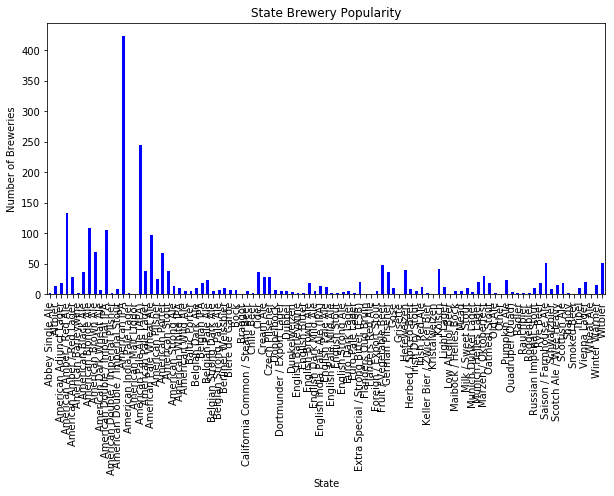

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [87]:
state_chart = count_brew.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("State Brewery Popularity")
state_chart.set_xlabel("State")
state_chart.set_ylabel("Number of Breweries")
plt.show()
plt.tight_layout

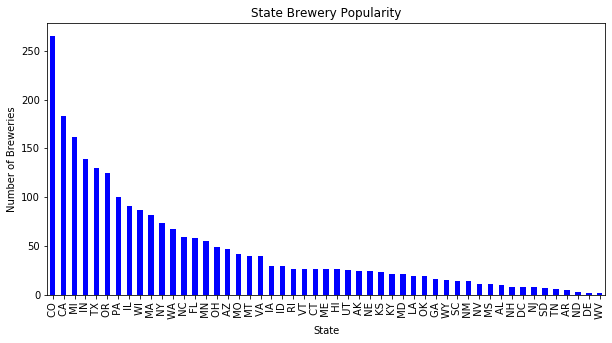

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [10]:
state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("State Brewery Popularity")
state_chart.set_xlabel("State")
state_chart.set_ylabel("Number of Breweries")
plt.show()
plt.tight_layout

In [11]:
state_and_style = poop_df[["state","style"]]
state_and_style = state_and_style.set_index("state")
state_and_style

,style
state,
MN,American IPA
MN,Milk / Sweet Stout
MN,English Brown Ale
MN,Pumpkin Ale
MN,American Porter
...,...
NY,Hefeweizen
NY,American IPA
NY,Milk / Sweet Stout


In [12]:
state_and_style_df = pd.DataFrame(state_and_style)

In [13]:
abv_and_style = poop_df[["abv","style"]]
abv_and_style = state_and_style.set_index("style")
abv_and_style

""
style
American IPA
Milk / Sweet Stout
English Brown Ale
Pumpkin Ale
American Porter
...
Hefeweizen
American IPA
Milk / Sweet Stout


In [78]:
style_data = style_data.head(5)

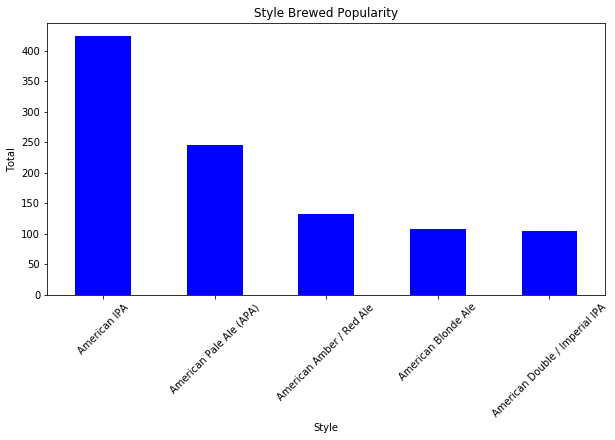

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [79]:
style_chart = style_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Style Brewed Popularity")
style_chart.set_xlabel("Style")
style_chart.set_ylabel("Total")
plt.show()
plt.tight_layout

In [14]:
state_and_style = poop_df[["state","style"]]
state_and_style = state_and_style.set_index("state")
state_and_style

,style
state,
MN,American IPA
MN,Milk / Sweet Stout
MN,English Brown Ale
MN,Pumpkin Ale
MN,American Porter
...,...
NY,Hefeweizen
NY,American IPA
NY,Milk / Sweet Stout


In [15]:
poop_df.nlargest(5, ['abv'])

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
374,51,Upslope Brewing Company,Boulder,CO,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),19.2
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
375,51,Upslope Brewing Company,Boulder,CO,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0


In [16]:
top_5 = poop_df.nlargest(5, ['abv'])

In [17]:
top_5

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
374,51,Upslope Brewing Company,Boulder,CO,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),19.2
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
375,51,Upslope Brewing Company,Boulder,CO,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0


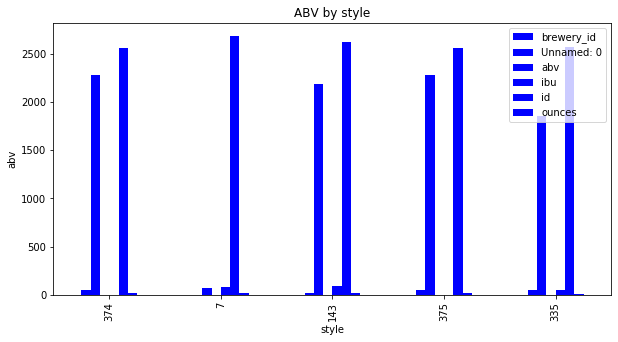

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [84]:
#state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
# plt.title("State Brewery Popularity")
# state_chart.set_xlabel("State")
# state_chart.set_ylabel("Number of Breweries")
# plt.show()
# plt.tight_layout

top_5_chart = top_5.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("ABV by style")
top_5_chart.set_xlabel("style")
top_5_chart.set_ylabel("abv")
plt.show()
plt.tight_layout

In [19]:
abv_and_style = poop_df[["style","abv"]]
abv_and_style = abv_and_style.set_index("style")
abv_and_style

,abv
style,
American IPA,0.045
Milk / Sweet Stout,0.049
English Brown Ale,0.048
Pumpkin Ale,0.060
American Porter,0.060
...,...
Hefeweizen,0.049
American IPA,0.068
Milk / Sweet Stout,0.049


In [20]:
new_poop_df=poop_df.dropna()
new_poop_df

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,1493,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,1494,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,1495,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,1496,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,1497,0.060,25.0,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2386,544,Pyramid Breweries,Seattle,WA,1677,0.052,18.0,82,Haywire Hefeweizen (2010),Hefeweizen,16.0
2387,545,Lancaster Brewing Company,Lancaster,PA,1189,0.066,30.0,392,Rumspringa Golden Bock,Maibock / Helles Bock,12.0
2388,545,Lancaster Brewing Company,Lancaster,PA,1190,0.048,28.0,195,Lancaster German Style Kölsch,Kölsch,12.0
2389,546,Upstate Brewing Company,Elmira,NY,2296,0.053,22.0,382,Common Sense Kentucky Common Ale,American Brown Ale,16.0


In [21]:
sorted_poop_df=new_poop_df.sort_values(by='abv', ascending=False)
sorted_poop_df

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0
207,25,Sun King Brewing Company,Indianapolis,IN,2066,0.099,60.0,394,Johan the Barleywine,English Barleywine,16.0
1017,166,Oskar Blues Brewery,Longmont,CO,1580,0.099,100.0,6,GUBNA Imperial IPA,American Double / Imperial IPA,12.0
...,...,...,...,...,...,...,...,...,...,...,...
338,46,Sixpoint Craft Ales,Brooklyn,NY,1860,0.032,7.0,2266,Rad,Fruit / Vegetable Beer,16.0
764,129,Straub Brewery,St Mary's,PA,2027,0.032,13.0,2231,American Light,Light Lager,12.0
2338,528,Asheville Brewing Company,Asheville,NC,138,0.032,27.0,550,Rocket Girl,Kölsch,12.0
669,109,"Woodstock Inn, Station & Brewery",North Woodstock,NH,2394,0.028,15.0,2306,Summer Brew,American Pilsner,12.0


In [24]:
# poop_df.plot(kind='scatter', x='style', y='abv', 
#                        title=f' Correlation of Style and ABV')
# plt.grid()

In [25]:
# state_data = poop_df["state"].value_counts()
# style_data = poop_df["style"].value_counts()
# style_state_data= state_data.add(style_data, fill_value=0)
# style_chart = style_data.plot(kind='bar', facecolor="blue", figsize=(30,5))
# plt.title("Style Brewed Popularity")
# state_chart.set_xlabel("Style")
# state_chart.set_ylabel("Number of Times Brewed")
# plt.show()
# plt.tight_layout

abv_data = poop_df["abv"].value_counts()

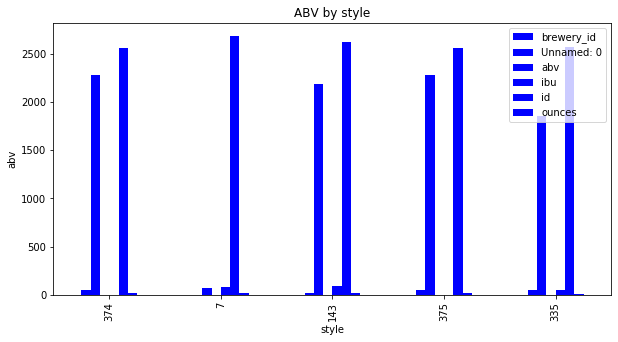

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [82]:
#state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
# plt.title("State Brewery Popularity")
# state_chart.set_xlabel("State")
# state_chart.set_ylabel("Number of Breweries")
# plt.show()
# plt.tight_layout

xlabel = 'style'
ylabel = 'abv'
top_5_chart = top_5.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("ABV by style")
top_5_chart.set_xlabel("style")
top_5_chart.set_ylabel("abv")
plt.show()
plt.tight_layout

In [30]:
group1 = poop_df[poop_df["style"] == "Quadrupel (Quad)"]["abv"]
group2 = poop_df[poop_df["style"] == "English Barleywine"]["abv"]
group3 = poop_df[poop_df["style"] == "Russian Imperial Stout"]["abv"]
group4 = poop_df[poop_df["style"] == "Rye Beer"]["abv"]

In [31]:
st.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=16.974056971673452, pvalue=8.914483349494272e-07)

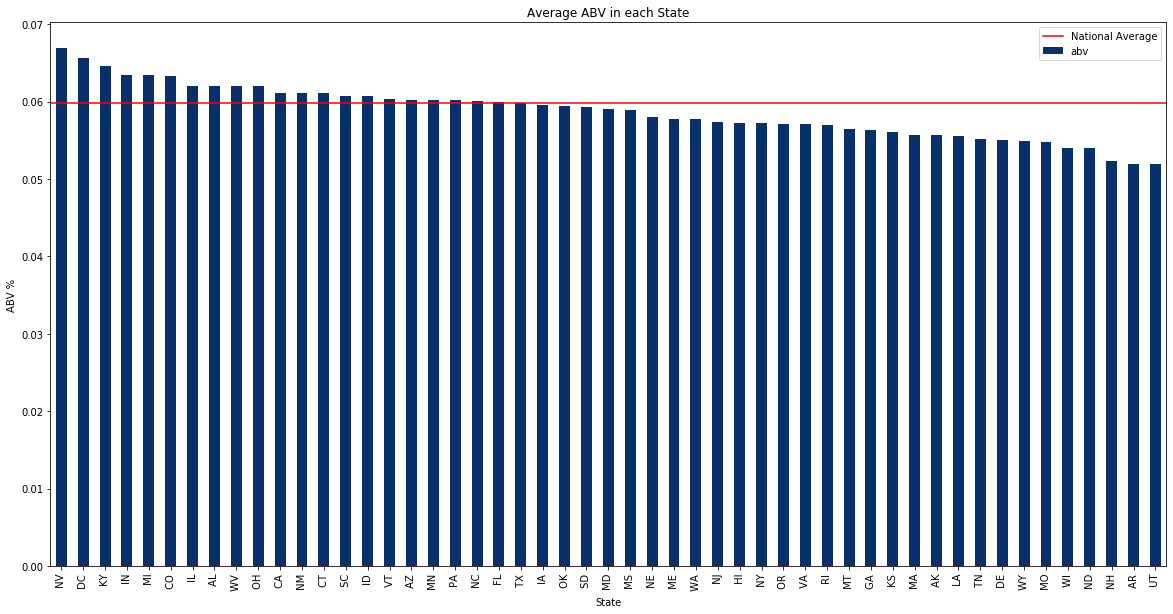

In [37]:
plot1 = poop_df.groupby('state')['abv'].mean().sort_values(ascending=False).plot(kind='bar',\
                                                                    title="Average ABV in each State", \
                                                                    figsize=(20,10), colormap='Blues_r')
plot1.set_xlabel('State')
plot1.set_ylabel('ABV %')
mean_line1 = plot1.axhline(poop_df.abv.mean(), color='r',\
                         label='National Average')
plot1.legend()

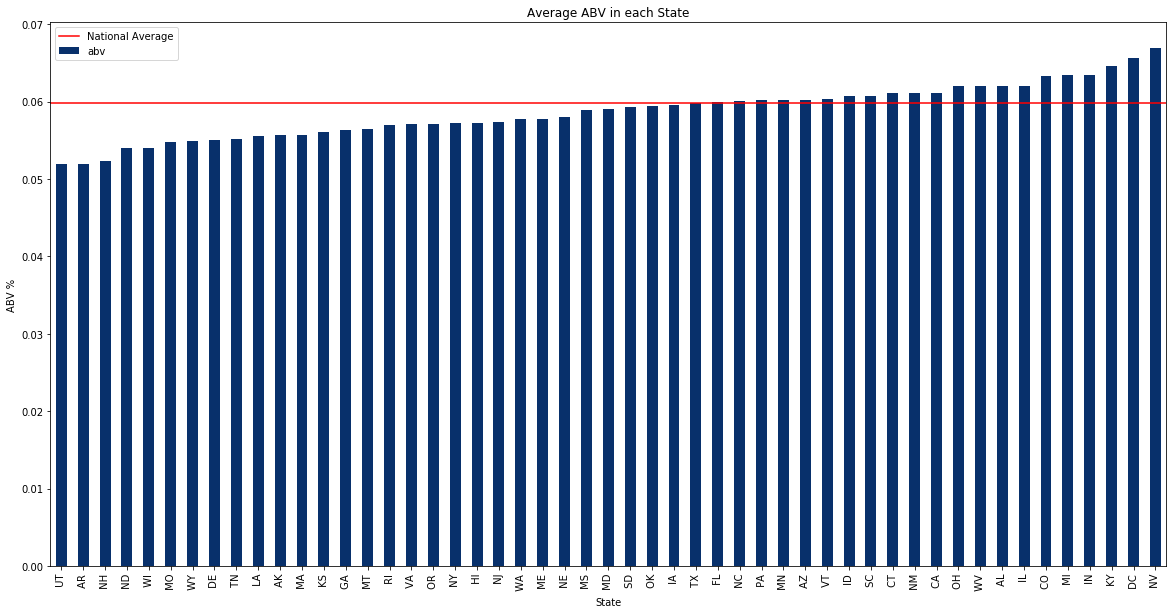

In [40]:
plot1 = poop_df.groupby('state')['abv'].mean().sort_values(ascending=True).plot(kind='bar',\
                                                                    title="Average ABV in each State", \
                                                                    figsize=(20,10), colormap='Blues_r')
plot1.set_xlabel('State')
plot1.set_ylabel('ABV %')
mean_line1 = plot1.axhline(poop_df.abv.mean(), color='r',\
                         label='National Average')
plot1.legend()

In [41]:
poop_df.nsmallest(5, ['abv'])

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
2322,522,Uncommon Brewers,Santa Cruz,CA,2266,0.001,NaN,606,Scotty K NA,Low Alcohol Beer,16.0
515,80,Hopworks Urban Brewery,Portland,OR,1074,0.027,21.0,2482,Totally Radler,Radler,16.0
1056,173,Evil Twin Brewing,Brooklyn,NY,769,0.027,NaN,1286,Bikini Beer,American IPA,12.0
669,109,"Woodstock Inn, Station & Brewery",North Woodstock,NH,2394,0.028,15.0,2306,Summer Brew,American Pilsner,12.0
338,46,Sixpoint Craft Ales,Brooklyn,NY,1860,0.032,7.0,2266,Rad,Fruit / Vegetable Beer,16.0


In [54]:
poop_5 = poop_df.nlargest(5, ['abv'])

In [95]:
poop_5

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
374,51,Upslope Brewing Company,Boulder,CO,2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),19.2
7,1,Against the Grain Brewery,Louisville,KY,70,0.125,80.0,2685,London Balling,English Barleywine,16.0
143,17,Tin Man Brewing Company,Evansville,IN,2189,0.120,90.0,2621,Csar,Russian Imperial Stout,16.0
375,51,Upslope Brewing Company,Boulder,CO,2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,19.2
335,46,Sixpoint Craft Ales,Brooklyn,NY,1857,0.100,52.0,2574,4Beans,Baltic Porter,12.0


Text(0.5, 1.0, 'Most popular Styles of Beer')

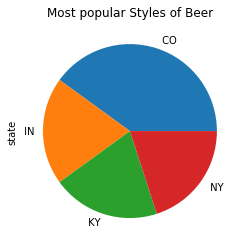

In [55]:
poop_5['state'].value_counts(15).plot(kind = "pie")
plt.title("Most popular Styles of Beer")

Text(0.5, 1.0, 'States with Highest ABV')

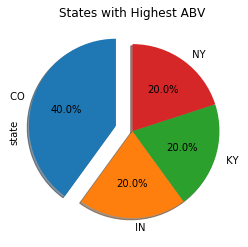

In [92]:
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()  

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

poop_5['state'].value_counts(15).plot(kind = "pie", explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
explode = (.2, 0, 0, 0)
plt.title("States with Highest ABV")

In [22]:
poop_5 = poop_df.nlargest(5, )
poop_5['state'].value_counts(15).plot(kind = "pie", explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
explode = (.2, 0, 0, 0)
plt.title("States with Highest ABV")


NameError: name 'poop_5' is not defined